# Exercise 2: Decision Trees

In this assignment you will implement a Decision Tree algorithm as learned in class.

## Read the following instructions carefully:

1. This jupyter notebook contains all the step by step instructions needed for this exercise.
1. Submission includes this notebook only with the exercise number and your ID as the filename. For example: `hw2_123456789_987654321.ipynb` if you submitted in pairs and `hw2_123456789.ipynb` if you submitted the exercise alone.
1. Write **efficient vectorized** code whenever possible. Some calculations in this exercise take several minutes when implemented efficiently, and might take much longer otherwise. Unnecessary loops will result in point deduction.
1. You are responsible for the correctness of your code and should add as many tests as you see fit. Tests will not be graded nor checked.
1. Write your functions in this notebook only. **Do not create Python modules and import them**.
1. You are allowed to use functions and methods from the [Python Standard Library](https://docs.python.org/3/library/) and [numpy](https://www.numpy.org/devdocs/reference/) only. **Do not import anything else.**
1. Your code must run without errors. Make sure your `numpy` version is at least 1.15.4 and that you are using at least python 3.6. Changes of the configuration we provided are at your own risk. Any code that cannot run will not be graded.
1. Write your own code. Cheating will not be tolerated.
1. Answers to qualitative questions should be written in **markdown** cells (with $\LaTeX$ support). Answers that will be written in commented code blocks will not be checked.

## In this exercise you will perform the following:
1. Practice OOP in python.
2. Implement two impurity measures: Gini and Entropy.
3. Construct a decision tree algorithm.
4. Prune the tree to achieve better results.
5. Visualize your results.

# I have read and understood the instructions: *** YOUR ID HERE ***

In [259]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# make matplotlib figures appear inline in the notebook
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

## Warmup - OOP in python

Our desicion tree will be implemented using a dedicated python class. Python classes are very similar to classes in Java.


You can use the following [site](https://jeffknupp.com/blog/2014/06/18/improve-your-python-python-classes-and-object-oriented-programming/) to learn about classes in python.

In [260]:
class Node(object):
    def __init__(self, data):
        self.data = data
        self.children = []

    def add_child(self, node):
        self.children.append(node)

In [261]:
n = Node(5)
p = Node(6)
q = Node(7)
n.add_child(p)
n.add_child(q)
n.children

[<__main__.Node at 0x16535a2f070>, <__main__.Node at 0x165306ff1f0>]

## Data preprocessing

For the following exercise, we will use a dataset containing mushroom data `agaricus-lepiota.csv`. 

This data set includes descriptions of hypothetical samples corresponding to 23 species of gilled mushrooms in the Agaricus and Lepiota Family. Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended. This latter class was combined with the poisonous
one (=there are only two classes **edible** and **poisonous**). 
    
The dataset contains 8124 observations with 22 features:
1. cap-shape: bell=b,conical=c,convex=x,flat=f,knobbed=k,sunken=s
2. cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
3. cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
4. bruises: bruises=t,no=f
5. odor: almond=a,anise=l,creosote=c,fishy=y,foul=f, musty=m,none=n,pungent=p,spicy=s
6. gill-attachment: attached=a,descending=d,free=f,notched=n
7. gill-spacing: close=c,crowded=w,distant=d
8. gill-size: broad=b,narrow=n
9. gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g,green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
10. stalk-shape: enlarging=e,tapering=t
11. stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r
12. stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
13. stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
14. stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
15. stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
16. veil-type: partial=p,universal=u
17. veil-color: brown=n,orange=o,white=w,yellow=y
18. ring-number: none=n,one=o,two=t
19. ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
20. spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
21. population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
22. habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

First, we will read and explore the data using pandas and the `.read_csv` method. Pandas is an open source library providing high-performance, easy-to-use data structures and data analysis tools for the Python programming language.

In [262]:
# load dataset
data = pd.read_csv('agaricus-lepiota.csv')


One of the advantages of the Decision Tree algorithm is that almost no preprocessing is required. However, finding missing values is always required.

In [263]:
#############################################################################
# TODO: Find columns with missing values and remove them from the data.#
#############################################################################
data=data.dropna(axis='columns') # dropping every feature where we miss some values.
#############################################################################
#                             END OF YOUR CODE                              #
#############################################################################

We will split the dataset to `Training` and `Testing` datasets.

In [264]:
from sklearn.model_selection import train_test_split
# Making sure the last column will hold the labels
X, y = data.drop('class', axis=1), data['class']
X = np.column_stack([X,y])
# split dataset using random_state to get the same split each time
X_train, X_test = train_test_split(X, random_state=99)
print(X_train.shape)

print("Training dataset shape: ", X_train.shape)
print("Testing dataset shape: ", X_test.shape)
labels = X_test[:,-1]
print(np.unique(labels, return_counts=True))

(6093, 22)
Training dataset shape:  (6093, 22)
Testing dataset shape:  (2031, 22)
(array(['e', 'p'], dtype=object), array([1028, 1003], dtype=int64))


In [265]:
y.shape

(8124,)

## Impurity Measures

Impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. Implement the functions `calc_gini` and `calc_entropy`. You are encouraged to test your implementation (10 points).

In [266]:
def calc_gini(data):
    """
    Calculate gini impurity measure of a dataset.
 
    Input:
    - data: any dataset where the last column holds the labels.
 
    Returns the gini impurity.    
    """
    gini = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    instances = data.shape[0]
    labels = data[:,-1]
    unique, counts = np.unique(labels, return_counts=True) # implementing the gini function
    gini = 1 - (1/instances**2) * sum(counts**2)
    X = dict(zip(unique, counts))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return gini

In [267]:
def calc_entropy(data):
    """
    Calculate the entropy of a dataset.

    Input:
    - data: any dataset where the last column holds the labels.

    Returns the entropy of the dataset.    
    """
    entropy = 0.0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    instances = data.shape[0]
    labels = data[:,-1]
    unique, counts = np.unique(labels, return_counts=True) # implementing the entropy function
    counts = counts / instances
    entropy = sum(-1 * counts * np.log2(counts))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return entropy

In [268]:
print("The gini impurity of the data is: " + str(calc_gini(X)))
print("The entropy for the data X is: " + str(calc_entropy(X)))

The gini impurity of the data is: 0.4995636322379775
The entropy for the data X is: 0.9993703627906085


## Goodness of Split

Given a feature the Goodnees of Split measures the reduction in the impurity if we split the data according to the feature.
$$
\Delta\varphi(S, A) = \varphi(S) - \sum_{v\in Values(A)} \frac{|S_v|}{|S|}\varphi(S_v)
$$

In our implementation the goodness_of_split function will return either the Goodness of Split or the Gain Ratio as learned in class. You'll control the return value with the `gain_ratio` parameter. If this parameter will set to False (the default value) it will return the regular Goodness of Split. If it will set to True it will return the Gain Ratio.
$$
GainRatio(S,A)=\frac{InformationGain(S,A)}{SplitInformation(S,A)}
$$
Where:
$$
InformationGain(S,A)=Goodness\ of\ Split\ calculated\ with\ Entropy\ as\ the\ Impurity\ function \\
SplitInformation(S,A)=- \sum_{a\in A} \frac{|S_a|}{|S|}\log\frac{|S_a|}{|S|}
$$
NOTE: you can add more parameters to the function and you can also add more returning variables (The given parameters and the given returning variable should not be touch). (10 Points)

In [269]:
def goodness_of_split(data, feature, impurity_func, gain_ratio=False):
    """
    Calculate the goodness of split of a dataset given a feature and impurity function.

    Input:
    - data: any dataset where the last column holds the labels.
    - feature: the feature index.
    - impurity func: a function that calculates the impurity.
    - gain_ratio: goodness of split or gain ratio flag.

    Returns the goodness of split (or the Gain Ration).  
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    instances = data.shape[0]
    split_info = 0
    if gain_ratio: #If Gaio Ratio True, func = entropy
        impurity_func = calc_entropy
     
    feature_column = data[:,feature]
    goodness = impurity_func(data)
    unique_values, counts = np.unique(feature_column, return_counts=True)
    
    for value,count in zip(unique_values,counts): # iterating over the unique class values for the goodness of split func
        ratio_value = count / instances
        same_value = data[feature_column == value]
        goodness -= (ratio_value * impurity_func(same_value))
    
        if gain_ratio:
            split_info -= ratio_value * np.log2(ratio_value)
            
            
    if gain_ratio:
        goodness =  goodness / split_info
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return goodness


In [270]:
print("Some tests for the goodness of split with different impurity function: ")
print("Entropy value : " + str(goodness_of_split(X,0, calc_entropy)))
print("Gini measure : " + str(goodness_of_split(X,0, calc_gini)))
print("Gain ratio : " + str(goodness_of_split(X,0, calc_gini, True)))

Some tests for the goodness of split with different impurity function: 
Entropy value : 0.030727291723502304
Gini measure : 0.019959657834442257
Gain ratio : 0.01859005255861653


## Building a Decision Tree

Use a Python class to construct the decision tree. Your class should support the following functionality:

1. Initiating a node for a decision tree. You will need to use several class methods and class attributes and you are free to use them as you see fit. We recommend that every node will hold the feature and value used for the split and its children.
2. Your code should support both Gini and Entropy as impurity measures. 
3. The provided data includes categorical data. In this exercise, when splitting a node create the number of children needed according to the attribute unique values.

Complete the class `DecisionNode`. The structure of this class is entirely up to you. 

Complete the function `build_tree`. This function should get the training dataset and the impurity as inputs, initiate a root for the decision tree and construct the tree according to the procedure you learned in class. (30 points)

In [271]:
class DecisionNode:
    """
    This class will hold everything you require to construct a decision tree.
    The structure of this class is up to you. However, you need to support basic 
    functionality as described above. It is highly recommended that you 
    first read and understand the entire exercise before diving into this class.
    """
    def __init__(self, feature):
        self.feature = feature # column index of criteria being tested
        self.parent = None
        self.children = []
        self.data = None
        self.depth = 0
        self.pred = None
        self.value = None
            
    def add_child(self, node):
        self.children.append(node)
        

In [272]:
def build_tree(data, impurity, gain_ratio=False, min_samples_split=1, max_depth=1000):
    """
    Build a tree using the given impurity measure and training dataset. 
    You are required to fully grow the tree until all leaves are pure. 

    Input:
    - data: the training dataset.
    - impurity: the chosen impurity measure. Notice that you can send a function
                as an argument in python.
    - gain_ratio: goodness of split or gain ratio flag
    - min_samples_split: the minimum number of samples required to split an internal node
    - max_depth: the allowable depth of the tree

    Output: the root node of the tree.
    """
    root = None
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    possible_features = [i for i in range(data.shape[1]-1)]
    best = best_feature(data, impurity, gain_ratio, possible_features) #finding the best current feature
    root = DecisionNode(best)
    root.data = data
    root.pred = find_pred_node(root) #the prediction of the root
    possible_features.remove(best)
    if check_homogenious(data) == True or data.shape[0] <= min_samples_split or root.depth >= max_depth or best == -1: return root 
    split_node(root, impurity, possible_features, gain_ratio, min_samples_split, max_depth) #recursively building the tree
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return root

In [273]:
def split_node(node, impurity, possible_features, gain_ratio=False, min_samples_split=1, max_depth=1000):
    
    feature_column = node.data[:,node.feature]
    unique_values = np.unique(feature_column)
    
    #for each value of the current node make a child which represents it
    for value in unique_values:
        same_value = node.data[feature_column == value]
        best = best_feature(same_value, impurity, gain_ratio, possible_features)
        new_node = DecisionNode(best)
        new_node.value = value
        new_node.data = same_value
        new_node.parent = node
        new_node.depth = node.depth + 1
        node.add_child(new_node)
        new_node.pred = find_pred_node(new_node)
        
        #if one of the conditions above is true then the new node is a leaf and should end the current recursive call
        if check_homogenious(same_value) == True or same_value.shape[0] <= min_samples_split or new_node.depth >= max_depth or best == -1: 
            continue
        
        #the recursive call
        x = possible_features.copy()
        x.remove(best)
        split_node(new_node, impurity, x, gain_ratio, min_samples_split, max_depth)

In [274]:
#predict the nodes label
def find_pred_node(node): 
        label_column = node.data[:,-1]
        labels = {}
        unique_values,counts = np.unique(label_column,return_counts = True)
        for value,count in zip(unique_values,counts):
            labels[value] = count
        return max(labels,key = labels.get)

In [275]:
#checks if the data given is homogenious
def check_homogenious(data): 
    labels = data[:,-1]
    unique, counts = np.unique(labels, return_counts=True)
    for count in counts:
        if len(unique) == 1:
            return True
    return False
    

In [292]:
# what is the best feature according to the goodness of split
def best_feature(data, impurity, gain_ratio, possible_features): 
    if not possible_features: return 1
    best_feature, best_val = -1, -1
    for feature in possible_features:
        current_val = goodness_of_split(data, feature, impurity, gain_ratio)
        if current_val > best_val: best_val, best_feature = current_val, feature
    if best_val == 0: return -1
    return best_feature
        

In [295]:
# python supports passing a function as an argument to another function.
tree_gini = build_tree(data=X_train, impurity=calc_gini) # gini and goodness of split
tree_entropy = build_tree(data=X_train, impurity=calc_entropy) # entropy and goodness of split
tree_entropy_gain_ratio = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True) # entropy and gain ratio

## Tree evaluation

Complete the functions `predict` and `calc_accuracy`. (10 points)

In [201]:
def predict(node, instance):
    """
    Predict a given instance using the decision tree
 
    Input:
    - root: the root of the decision tree.
    - instance: an row vector from the dataset. Note that the last element 
                of this vector is the label of the instance.
 
    Output: the prediction of the instance.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    for child in node.children:
        if instance[node.feature] == child.value:
            return predict(child, instance)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return node.pred

In [202]:
def calc_accuracy(node, dataset):
    """
    Predict a given dataset using the decision tree
 
    Input:
    - node: a node in the decision tree.
    - dataset: the dataset on which the accuracy is evaluated
 
    Output: the accuracy of the decision tree on the given dataset (%).
    """
    accuracy = 0
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    for instance in dataset:
        if predict(node, instance) == instance[-1]: accuracy += 1
    accuracy = (accuracy/dataset.shape[0])*100
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return accuracy 

After building the three trees using the training set, you should calculate the accuracy on the test set. For each tree print the training and test accuracy. Select the tree that gave you the best test accuracy. For the rest of the exercise, use that tree (when you asked to build another tree use the same impurity function and same gain_ratio flag). 

In [296]:
tree_dict = [tree_gini, tree_entropy, tree_entropy_gain_ratio]

for tree in tree_dict:
    print("the accuracy of X_test is: ", calc_accuracy(tree, X_test))
    
for tree in tree_dict:
    print("the accuracy of X_train is: ", calc_accuracy(tree, X_train))
    
    

the accuracy of X_test is:  77.5972427375677
the accuracy of X_test is:  77.30182176267849
the accuracy of X_test is:  78.58197932053176
the accuracy of X_train is:  99.24503528639423
the accuracy of X_train is:  99.40915805022156
the accuracy of X_train is:  99.63892991957984


## Depth pruning

(15 points)

Consider the following max_depth values: [1, 2, 3, 4, 5, 6, 7, 8]. For each value, construct a tree and prune it according to the max_depth value = don't let the tree to grow beyond this depth. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the max_depth. Mark the best result on the graph with red circle.

In [278]:
test_dict = {}
train_dict = {}
for i in range(1,9):
    train_dict[i] = calc_accuracy(build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split=1, max_depth=i), X_train)
    test_dict[i] = calc_accuracy(build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split=1, max_depth=i), X_test)
    


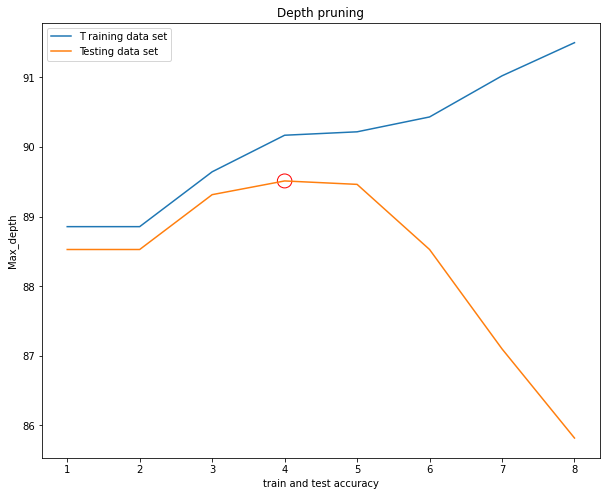

In [279]:
mytraindict = train_dict.items()
mytestdict = test_dict.items()
x, y = zip(*mytraindict)
a, b = zip(*mytestdict)
max_value = max(test_dict, key=test_dict.get)
plt.plot(x, y, label = "T raining data set")
plt.plot(a, b, label = "Testing data set")
c1 = plt.Circle((max_value,test_dict[max_value]), radius = 0.1, color ='r', fill = False)
plt.gca().add_artist(c1)
plt.legend()
plt.xlabel('train and test accuracy')
plt.ylabel('Max_depth')
plt.title('Depth pruning')
plt.show()

In [280]:
print(train_dict)
print(test_dict)

{1: 88.85606433612342, 2: 88.85606433612342, 3: 89.64385360249466, 4: 90.16904644674216, 5: 90.21828327589037, 6: 90.43164286886591, 7: 91.02248481864434, 8: 91.49844083374364}
{1: 88.52781880846874, 2: 88.52781880846874, 3: 89.31560807483999, 4: 89.51255539143278, 5: 89.46331856228458, 6: 88.52781880846874, 7: 87.09995076317085, 8: 85.81979320531758}



## Min Samples Split

(15 points)

Consider the following min_samples_split values: [1, 5, 10, 20, 50]. For each value, construct a tree and prune it according to the min_samples_split value = don't split a node if the number of sample in it is less or equal to the min_samples_split value. Next, calculate the training and testing accuracy.<br>
On a single plot, draw the training and testing accuracy as a function of the min_samples_split. Mark the best result on the graph with red circle. (make sure that the x-axis ticks represent the values of min_samples_split)

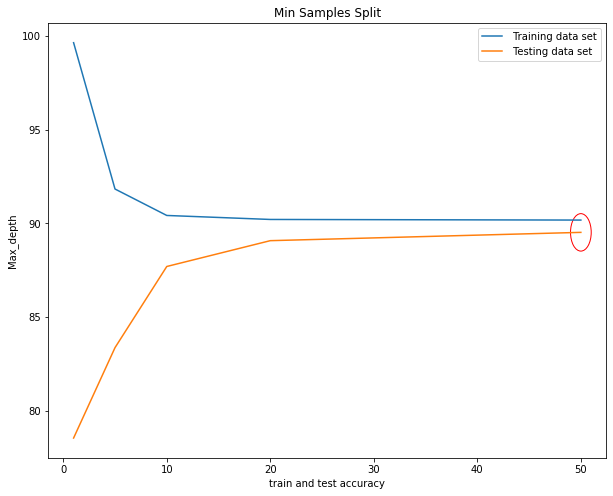

In [281]:
test_dict = {}
train_dict = {}
for i in [1, 5, 10, 20, 50]:
    train_dict[i] = calc_accuracy(build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split = i), X_train)
    test_dict[i] = calc_accuracy(build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split = i), X_test)

    
mytraindict = train_dict.items()
mytestdict = test_dict.items()
max_value2 = max(test_dict, key=test_dict.get)
x, y = zip(*mytraindict)
a, b = zip(*mytestdict)

plt.plot(x, y, label = " Training data set")
plt.plot(a, b, label = " Testing data set")
c1 = plt.Circle((max_value2,test_dict[max_value2]), radius = 1, color ='r', fill = False)
plt.gca().add_artist(c1)
plt.legend()
plt.xlabel('train and test accuracy')
plt.ylabel('Max_depth')
plt.title('Min Samples Split')
plt.show()

In [282]:
print(train_dict)
print(test_dict)

{1: 99.63892991957984, 5: 91.82668636139833, 10: 90.41523059248317, 20: 90.20187099950763, 50: 90.16904644674216}
{1: 78.53274249138356, 5: 83.35795174790744, 10: 87.69079271294929, 20: 89.06942392909897, 50: 89.51255539143278}


Build the best 2 trees:
1. tree_max_depth - the best tree according to max_depth pruning
1. tree_min_samples_split - the best tree according to min_samples_split pruning

In [293]:
tree_max_depth = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, max_depth = 4)
tree_min_samples_split = build_tree(data=X_train, impurity=calc_entropy, gain_ratio=True, min_samples_split = 50)

## Number of Nodes

(5 points)

Complete the function counts_nodes and print the number of nodes in each tree and print the number of nodes of the two trees above

In [284]:
def count_nodes(node):
    if node.parent:
        shimon = go_to_father(node)
    else: shimon = node
    return count_nodes_rec(shimon)

In [285]:
def go_to_father(node):
    if not node.parent: 
        return node
    return go_to_father(node.parent)

In [286]:
def count_nodes_rec(node):
    """
    Count the number of node in a given tree
 
    Input:
    - node: a node in the decision tree.
 
    Output: the number of node in the tree.
    """
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    if not node.children: return 1
    return 1 + sum([count_nodes_rec(child) for child in node.children])
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    

In [294]:
print(count_nodes(tree_max_depth))
print(count_nodes(tree_min_samples_split))

205
349


## Print the tree

Complete the function `print_tree`. Your tree should be visualized clearly. You can use the following example as a reference:
```
[ROOT, feature=X0],
  [X0=a, feature=X2]
    [X2=c, leaf]: [{1.0: 10}]
    [X2=d, leaf]: [{0.0: 10}]
  [X0=y, feature=X5], 
    [X5=a, leaf]: [{1.0: 5}]
    [X5=s, leaf]: [{0.0: 10}]
  [X0=e, leaf]: [{0.0: 25, 1.0: 50}]
```
In each brackets:
* The first argument is the parent feature with the value that led to current node
* The second argument is the selected feature of the current node
* If the current node is a leaf, you need to print also the labels and their counts

(5 points)

In [297]:
# you can change the function signeture
def print_tree(node, depth=0, parent_feature='ROOT', feature_val='ROOT'):
    '''
    prints the tree according to the example above

    Input:
    - node: a node in the decision tree

    This function has no return value
    '''
    ###########################################################################
    # TODO: Implement the function.                                           #
    ###########################################################################
    space_tabs = "  " * depth
    
    if parent_feature == "ROOT":
        space_tabs += "[ROOT, feature=X" + str(node.feature) + "]"
        
    if node.parent and len(node.children) != 0:
        space_tabs += "[" + str(parent_feature) + "=" + str(node.value)+ ", feature=X" + str(feature_val) + "]"
        
    if node.parent and len(node.children) == 0:
        label_column = node.data[:,-1]
        labels = {}
        unique_values,counts = np.unique(label_column,return_counts = True)
        for value,count in zip(unique_values,counts):
            labels[value] = count
        space_tabs += "[" + str(node.parent.feature) + "=" + str(node.value) + ", leaf]: [" + str(labels) + "]"
    
    
    print(space_tabs)
        
    for child in node.children:
        print_tree(child, child.depth, parent_feature=node.feature, feature_val=child.feature)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
   

print the tree with the best test accuracy and with less than 50 nodes (from the two pruning methods)

In [298]:
#print_tree(tree_max_depth)
dict_of_trees = {}
max_accuracy = 0
for depth in range(1,9):
    for split in [1, 5, 10, 20, 50]:
        dic_key = (depth,split)
        the_tree = build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split = split, max_depth = depth)
        dict_of_trees[dic_key] = count_nodes(the_tree)
        the_accuracy = calc_accuracy(the_tree, X_test)
        if count_nodes(the_tree) <= 50 and the_accuracy > max_accuracy:
            max_accuracy = the_accuracy
            the_depth = depth
            the_split = split

the_final_tree = build_tree(X_train, calc_entropy, gain_ratio=True, min_samples_split = the_split, max_depth = the_depth) 
print("For depth of: " + str(the_depth) + " and for sample split of: " + str(the_split) + " the number of nodes is: " + str(count_nodes(the_final_tree)))
print("And we'll represent the tree as follow:")
print()
print_tree(the_final_tree)

   

For depth of: 1 and for sample split of: 1 the number of nodes is: 10
And we'll represent the tree as follow:

[ROOT, feature=X4]
  [4=a, leaf]: [{'e': 273, 'p': 31}]
  [4=c, leaf]: [{'e': 10, 'p': 137}]
  [4=f, leaf]: [{'e': 170, 'p': 1438}]
  [4=l, leaf]: [{'e': 272, 'p': 27}]
  [4=m, leaf]: [{'e': 2, 'p': 25}]
  [4=n, leaf]: [{'e': 2332, 'p': 344}]
  [4=p, leaf]: [{'e': 8, 'p': 175}]
  [4=s, leaf]: [{'e': 38, 'p': 380}]
  [4=y, leaf]: [{'e': 49, 'p': 382}]
